In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv("merged_output.csv")
df.head()

/var/folders/p0/zvl7gz994b7bk8mzxm2d5sc00000gn/T/ipykernel_92476/1192622700.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("merged_output.csv")


,__typename_Rating,adminReviewedAt_Rating,attendanceMandatory_Rating,clarityRating_Rating,class_Rating,comment_Rating,createdByUser_Rating,date_Rating,difficultyRating_Rating,flagStatus_Rating,...,thumbs_Rating,thumbsDownTotal_Rating,thumbsUpTotal_Rating,wouldTakeAgain_Rating,ProfessorName,Department,SchoolName,LegacyId,NumRatings,predictedGender
0,Rating,2014-10-12 19:53:44 +0000 UTC,NaN,5.0,PH1C,genius enthusiastic really cares that we learn...,False,2014-10-12 19:51:32 +0000 UTC,3.0,UNFLAGGED,...,[],0.0,0.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male
1,Rating,NaN,NaN,4.0,PHYS1,this guy actually sat down with me and went ov...,False,2005-12-08 02:15:58 +0000 UTC,2.0,UNFLAGGED,...,[{'computerId': '7610E82DC63E5465E4DECE93C5AB4...,0.0,2.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male
2,Rating,NaN,NaN,2.0,PH1BC,seemed sort of scary to me lectures really had...,False,2005-06-01 22:21:35 +0000 UTC,5.0,UNFLAGGED,...,[{'computerId': '7610E82DC63E5465E4DECE93C5AB4...,1.0,0.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male
3,Rating,NaN,NaN,5.0,PH1BC,no comments,False,2005-02-13 22:58:06 +0000 UTC,3.0,UNFLAGGED,...,[{'computerId': '2D777623F4F23069E44333A863E40...,0.0,1.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male
4,Rating,NaN,NaN,3.0,PH1BC,he made fun of me gt o,False,2004-06-04 01:14:40 +0000 UTC,4.0,UNFLAGGED,...,[],0.0,0.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male


In [3]:
# Define the word to search for
word_to_search = 'hello'

df.dropna(inplace=True)
search_results = df[df.apply(lambda row: row.astype(str).str.contains(word_to_search, case=False).any(), axis=1)]

# Display the professor name, university name, and comment for each found record
if not search_results.empty:
    print("Search results for '{}':".format(word_to_search))
    for index, row in search_results.iterrows():
        print("Professor Name: {}, University Name: {}".format(row['ProfessorName'], row['SchoolName']))
        print("Comment: {}".format(row['comment_Rating']))
        print()
else:
    print("No records found for '{}'.")


Search results for 'hello':
Professor Name: Paul Taele, University Name: Texas A&M University at College Station
Comment: you must go to class to pass this course paul does not upload any of his quot slides quot because he just writes on the whiteboard in class tests should be easy but he puts trick questions on them he is a knowledgeable guy but he did not know how to teach the material well at all

Professor Name: Farshad Ghanei, University Name: University at Buffalo (SUNY Buffalo)
Comment: he may have sounded like a good prof but wait till you get deeper into it

Professor Name: Farshad Ghanei, University Name: University at Buffalo (SUNY Buffalo)
Comment: he tries a little but not enough his lectures get hard to watch and his tests do make you feel any better



In [4]:
df.isnull().sum()

__typename_Rating             0
adminReviewedAt_Rating        0
attendanceMandatory_Rating    0
clarityRating_Rating          0
class_Rating                  0
comment_Rating                0
createdByUser_Rating          0
date_Rating                   0
difficultyRating_Rating       0
flagStatus_Rating             0
grade_Rating                  0
helpfulRating_Rating          0
id_Rating                     0
isForCredit_Rating            0
isForOnlineClass_Rating       0
legacyId_Rating               0
ratingTags_Rating             0
teacherNote_Rating            0
textbookUse_Rating            0
thumbs_Rating                 0
thumbsDownTotal_Rating        0
thumbsUpTotal_Rating          0
wouldTakeAgain_Rating         0
ProfessorName                 0
Department                    0
SchoolName                    0
LegacyId                      0
NumRatings                    0
predictedGender               0
dtype: int64

In [5]:
df.describe()

,clarityRating_Rating,difficultyRating_Rating,helpfulRating_Rating,legacyId_Rating,textbookUse_Rating,thumbsDownTotal_Rating,thumbsUpTotal_Rating,wouldTakeAgain_Rating,LegacyId,NumRatings
count,378.000000,378.000000,378.000000,3.780000e+02,378.000000,378.000000,378.000000,378.000000,3.780000e+02,378.000000
mean,3.346561,3.407407,3.346561,3.471469e+07,2.489418,0.756614,1.105820,0.563492,1.806205e+06,85.375661
std,1.666968,1.150780,1.666968,2.142711e+06,2.519135,2.925062,1.924136,0.496610,7.688418e+05,84.021291
min,1.000000,1.000000,1.000000,2.789767e+07,-1.000000,0.000000,0.000000,0.000000,1.459400e+04,2.000000
25%,2.000000,3.000000,2.000000,3.348923e+07,0.000000,0.000000,0.000000,0.000000,1.022719e+06,22.000000
50%,4.000000,3.000000,4.000000,3.466303e+07,3.000000,0.000000,0.000000,1.000000,1.974700e+06,50.500000
75%,5.000000,4.000000,5.000000,3.615080e+07,5.000000,0.000000,1.000000,1.000000,2.472294e+06,113.000000
max,5.000000,5.000000,5.000000,3.881488e+07,5.000000,37.000000,16.000000,1.000000,2.907683e+06,502.000000


In [6]:
df.count()

__typename_Rating             378
adminReviewedAt_Rating        378
attendanceMandatory_Rating    378
clarityRating_Rating          378
class_Rating                  378
comment_Rating                378
createdByUser_Rating          378
date_Rating                   378
difficultyRating_Rating       378
flagStatus_Rating             378
grade_Rating                  378
helpfulRating_Rating          378
id_Rating                     378
isForCredit_Rating            378
isForOnlineClass_Rating       378
legacyId_Rating               378
ratingTags_Rating             378
teacherNote_Rating            378
textbookUse_Rating            378
thumbs_Rating                 378
thumbsDownTotal_Rating        378
thumbsUpTotal_Rating          378
wouldTakeAgain_Rating         378
ProfessorName                 378
Department                    378
SchoolName                    378
LegacyId                      378
NumRatings                    378
predictedGender               378
dtype: int64

In [7]:
df['ProfessorName'].nunique()

112

In [8]:
df["teacherNote_Rating"].unique()

array(["{'comment': 'Good luck in the home stretch and remember we’re here to help if and as you need it! ', 'createdAt': '2021-11-03 16:00:06 +0000 UTC', 'flagStatus': 'REVIEWED', 'id': 'VGVhY2hlck5vdGVzLTEyNjcy', 'legacyId': 12672, 'teacherId': '894586', 'updatedAt': '2021-11-03 16:00:06 +0000 UTC'}",
       "{'comment': 'RIP! How dramatic! Scary, even! Let’s put your theory to the test- come into the office and let’s review your exam questions. We’ll count how many were covered in lectures, slideshows, online forums vs how many were textbook-only. These types of comments come from those who need but don’t seek help &amp; would rather just scare. I’d prefer to help.', 'createdAt': '2021-09-21 10:43:24 +0000 UTC', 'flagStatus': 'REVIEWED', 'id': 'VGVhY2hlck5vdGVzLTEyNDYz', 'legacyId': 12463, 'teacherId': '894586', 'updatedAt': '2021-09-21 11:59:08 +0000 UTC'}",
       "{'comment': 'Asked two TAs today if they remember my EVER telling students the “bathroom breaks” bit; neither did. Co

In [9]:
df_teacher_notes = df[["ProfessorName","teacherNote_Rating"]]

In [10]:
df_teacher_notes.dropna(inplace=True)

/var/folders/p0/zvl7gz994b7bk8mzxm2d5sc00000gn/T/ipykernel_92476/4272807102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teacher_notes.dropna(inplace=True)


In [11]:
df_teacher_notes

,ProfessorName,teacherNote_Rating
47383,John Kuzenski,{'comment': 'Good luck in the home stretch and...
47385,John Kuzenski,"{'comment': 'RIP! How dramatic! Scary, even! L..."
47388,John Kuzenski,{'comment': 'Asked two TAs today if they remem...
47403,John Kuzenski,{'comment': 'I’ve never told anyone it’s “thei...
47404,John Kuzenski,{'comment': 'I’m glad you didn’t give up and a...
...,...,...
2918758,Nicholas Hartmann,{'comment': 'Thank you! I look forward to havi...
2918760,Nicholas Hartmann,"{'comment': 'Thank you! ', 'createdAt': '2023-..."
2918761,Nicholas Hartmann,{'comment': 'Thank you! I will no longer be te...
2919508,Amr El Zawily,{'comment': 'Thank you. I appreciate it. I wou...


In [12]:
common_asian_names = [
    'Chen', 'Chang', 'Chao', 'Cheng', 'Cho', 'Choi', 'Chong', 'Chou', 'Chow', 'Chu', 'Feng', 'Gao', 'Guo', 'Ho',
    'Hsu', 'Huang', 'Jiang', 'Kim', 'Koh', 'Kuo', 'Lee', 'Leong', 'Li', 'Liang', 'Lim', 'Lin', 'Liu', 'Lu', 'Ma',
    'Ng', 'Nguyen', 'Ong', 'Park', 'Phan', 'Shen', 'Singh', 'Song', 'Tan', 'Tang', 'Wang', 'Wong', 'Wu', 'Xu',
    'Yang', 'Yao', 'Yeh', 'Yen', 'Yeo', 'Yong', 'Yu', 'Yuan', 'Yuen', 'Zhang', 'Zhao', 'Zhou',
    'Patel', 'Shah', 'Khan', 'Singh', 'Sharma', 'Gupta', 'Kumar', 'Joshi', 'Desai', 'Mehta', 'Choudhury', 'Malhotra',
    'Gandhi', 'Verma', 'Reddy', 'Bose', 'Sinha', 'Rao', 'Thakur', 'Roy', 'Das', 'Pandey', 'Naidu', 'Menon', 'Iyer',
    'Nair', 'Raj', 'Chatterjee', 'Mukherjee'
]

In [13]:
def is_asian(name):
    if any(asian_name in name for asian_name in common_asian_names):
        return "Yes"
    else:
        return "No"

df['AsianProfessor'] = df['ProfessorName'].apply(is_asian)

In [14]:
df['AsianProfessor'].count()

378

In [15]:
counts = df['AsianProfessor'].value_counts()

print(counts)

AsianProfessor
No     333
Yes     45
Name: count, dtype: int64


In [18]:
verification_data = df.sample(n=200, random_state=42)  

true_predictions = 0
false_predictions = 0


for index, row in verification_data.iterrows():
    print("Professor Name:", row['ProfessorName'])
    print("Predicted as Asian Professor:", row['AsianProfessor'])
    verification = input("Is this prediction true or false? (Enter 't' for true, 'f' for false): ").lower()
    if verification == 't':
        true_predictions += 1
    elif verification == 'f':
        false_predictions += 1

print("Total True Predictions:", true_predictions)
print("Total False Predictions:", false_predictions)

Professor Name: Jack Dalton
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Linda Bailey
Predicted as Asian Professor: Yes


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Michele Parker
Predicted as Asian Professor: Yes


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Taylor Sorensen
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Deborah Schwartz
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Kilan Ashad-Bishop
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Farshad Ghanei
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Xiao Qin
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Alexander Moudrov
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Patrick Hill
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Nate Brophy
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Joanna Eisele
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Wayne Horn
Predicted as Asian Professor: Yes


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Xiao Qin
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Alexander Moudrov
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Alexander Moudrov
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jennifer Houston
Predicted as Asian Professor: Yes


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Jeorgette Perry
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Farshad Ghanei
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jeorgette Perry
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Akea Kahikina
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Taylor Sorensen
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Evan Bingham
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: John Kuzenski
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Elizabeth Naranjo Hayes
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  tt


Professor Name: John Young
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Siobhan Van Lanen
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Alexander Moudrov
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: John Kuzenski
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jeorgette Perry
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Joshua Henry
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Taylor Sorensen
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Gideon Shbeeb
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Tom Kennedy
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Haynes Heaton
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Tom Kennedy
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Tom Kennedy
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Nicholas Hartmann
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Scott Woodward
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Michael Cornick
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Joshua Henry
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Michael Barankin
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Wayne Horn
Predicted as Asian Professor: Yes


Is this prediction true or false? (Enter 't' for true, 'f' for false):  tf


Professor Name: Deborah Schwartz
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Judith Mansilla
Predicted as Asian Professor: Yes


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Haynes Heaton
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Wayne Horn
Predicted as Asian Professor: Yes


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Deborah Schwartz
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Alexander Moudrov
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Deborah Schwartz
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jeorgette Perry
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Rachel Pikstein
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Henrik Sternberg
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Tiffany Lewis
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: John Kuzenski
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Evan Bingham
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Tom Kennedy
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Elio Arteaga
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Deborah Schwartz
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jeorgette Perry
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Joshua Henry
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Evan Bingham
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Amr El Zawily
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Rachel Pikstein
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Shedrick Boren
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: John Kuzenski
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jennifer Houston
Predicted as Asian Professor: Yes


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Xiao Qin
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Alexander Moudrov
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Bradley Miller
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Deborah Schwartz
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Joshua Henry
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Brett Decker
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Robert Overstreet
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jeorgette Perry
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Irfan Nooruddin
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Taylor Sorensen
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Anthony Almudevar
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Robert Overstreet
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Irfan Nooruddin
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Joshua Henry
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Farshad Ghanei
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Oleg Makarenkov
Predicted as Asian Professor: Yes


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Elizabeth Naranjo Hayes
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Vincent Chapman
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  tt


Professor Name: Kilan Ashad-Bishop
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Michael Barankin
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Deborah Schwartz
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Alexander Moudrov
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: John Kuzenski
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jack Santucci
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Michael Cornick
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Thomas  Barnay 
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Thomas  Barnay 
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: James Shackleford
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jaime Noriega
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Irfan Nooruddin
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Molly Overcash
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Deborah Schwartz
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Farshad Ghanei
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Carrie Sanchez
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  tt


Professor Name: Simon Lee
Predicted as Asian Professor: Yes


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jen Womeldorf-Dunn
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Thomas  Barnay 
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Michael Barankin
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Rachel Caswell
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Lauren Dalton
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jeorgette Perry
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Alexander Moudrov
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jamille  Palacios Rivera
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Joshua Henry
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Joshua Henry
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jaime Noriega
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Alexander Moudrov
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Nicholas Hartmann
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Carrie Sanchez
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jennifer Houston
Predicted as Asian Professor: Yes


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Lisa St Clare
Predicted as Asian Professor: Yes


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Jaime Noriega
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Carrie Sanchez
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  


Professor Name: Jeorgette Perry
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Alexander Moudrov
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Joanna Eisele
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Michael Barankin
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Melissa Hughes
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Haynes Heaton
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  


Professor Name: Jennifer Houston
Predicted as Asian Professor: Yes


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Michael Barankin
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Taylor Sorensen
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jack Dalton
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Carlos Ibarra
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Carrie Sanchez
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Elio Arteaga
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Evan Bingham
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Stephen Moody
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Deborah Schwartz
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jeorgette Perry
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Michael Givel
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: John Kuzenski
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Carrie Sanchez
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Carrie Sanchez
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: John Kuzenski
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Evan Bingham
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Anna O'Leary
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Xiao Qin
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Thomas Gallanis
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  ft


Professor Name: Vincent Chapman
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Dianna Cichocki
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Margaret Smallwood
Predicted as Asian Professor: Yes


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Bryce Bow
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Bryce Bow
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Xiao Qin
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Evan Bingham
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Patrick Hill
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Michael Leuenberger
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Justin Sheldon
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Deborah Schwartz
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Michael Cornick
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Martin Clifford
Predicted as Asian Professor: Yes


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Taylor Sorensen
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Ian Campbell
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Martin Clifford
Predicted as Asian Professor: Yes


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Gideon Shbeeb
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Deborah Schwartz
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Michael Barankin
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Tom Kennedy
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Taylor Sorensen
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jeorgette Perry
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Deborah Schwartz
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Farshad Ghanei
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Margaret Smallwood
Predicted as Asian Professor: Yes


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Carrie Sanchez
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Eugene Tadie
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: John Young
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Michael Cornick
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Taylor Sorensen
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Christine Dargon
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Xiao Qin
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Robert Overstreet
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Khodayar Sarfaraz
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Robert Overstreet
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Hank Smith
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Ian Campbell
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Alexander Moudrov
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Carrie Sanchez
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: John Young
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Carrie Sanchez
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Michael Cornick
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Tom Kennedy
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: John Kuzenski
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Farshad Ghanei
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  


Professor Name: Jazmine Jones
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Joanna Eisele
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jeorgette Perry
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Evan Bingham
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Irfan Nooruddin
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Sky King
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jeorgette Perry
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Farshad Ghanei
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Alexander Moudrov
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Total True Predictions: 168
Total False Predictions: 24


In [21]:
verification_data = df.sample(n=100, random_state=28)  

true_predictions = 0
false_predictions = 0

for index, row in verification_data.iterrows():
    print("Professor Name:", row['ProfessorName'])
    print("Predicted as Asian Professor:", row['AsianProfessor'])
    verification = input("Is this prediction true or false? (Enter 't' for true, 'f' for false): ").lower()
    if verification == 't':
        true_predictions += 1
    elif verification == 'f':
        false_predictions += 1

print("Total True Predictions:", true_predictions)
print("Total False Predictions:", false_predictions)

Professor Name: Deborah Schwartz
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Johnathan Mell
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Eugene Tadie
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Robert Overstreet
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Sky King
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Linda Bailey
Predicted as Asian Professor: Yes


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Michael Barankin
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Tom Kennedy
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Simon Lee
Predicted as Asian Professor: Yes


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Linda Bailey
Predicted as Asian Professor: Yes


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Deborah Schwartz
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: John Kuzenski
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Taylor Sorensen
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Alexander Moudrov
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Deborah Schwartz
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Evan Bingham
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Nick Mason
Predicted as Asian Professor: Yes


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Tiffany Lewis
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Joanna Eisele
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Alexander Moudrov
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Alexander Moudrov
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jeorgette Perry
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: John Kuzenski
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Irfan Nooruddin
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Philip Hemmer
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Robert Overstreet
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jack Dalton
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Carrie Sanchez
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Robert Overstreet
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Annalisa Barron
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jeorgette Perry
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Deborah Schwartz
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Brett Decker
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Xiao Qin
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Akea Kahikina
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Shedrick Boren
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Evan Bingham
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Christine Herlihy
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Margaret Smallwood
Predicted as Asian Professor: Yes


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Jennifer Houston
Predicted as Asian Professor: Yes


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Carrie Sanchez
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Steven Brandon
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Xiao Qin
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Rachel Caswell
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Joshua Henry
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jeorgette Perry
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Carrie Sanchez
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Christine Dargon
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Rachel Caswell
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Wayne Horn
Predicted as Asian Professor: Yes


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Farshad Ghanei
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jack Santucci
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Tom Kennedy
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Joshua Madsen
Predicted as Asian Professor: Yes


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Christine Dargon
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Christine Dargon
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Vincent Chapman
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Amit Katti
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jack Dalton
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Rachel Pikstein
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Mandy Sharpe
Predicted as Asian Professor: Yes


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Henrik Sternberg
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jennifer Houston
Predicted as Asian Professor: Yes


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Deborah Schwartz
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jamille  Palacios Rivera
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Farshad Ghanei
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Michael Givel
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Rachel Pikstein
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: John Young
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Deborah Schwartz
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: John Young
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Carrie Sanchez
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Henrik Sternberg
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Nicki Fraser
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Alexander Moudrov
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Carrie Sanchez
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jack Dalton
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Michael Cornick
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Carrie Sanchez
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Farshad Ghanei
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Kenny Martin
Predicted as Asian Professor: Yes


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Michele Parker
Predicted as Asian Professor: Yes


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Matthew Shuman
Predicted as Asian Professor: Yes


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Thomas  Barnay 
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Xiao Qin
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Joshua Henry
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jeorgette Perry
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Tom Kennedy
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Mark Longo
Predicted as Asian Professor: Yes


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Andrew Graciano
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Joshua Henry
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Xiao Qin
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Farshad Ghanei
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Tom Kennedy
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Deborah Schwartz
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Irfan Nooruddin
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Xiao Qin
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Alexander Moudrov
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Evan Bingham
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Michael Cornick
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Mirette Misak
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Dianna Cichocki
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Deborah Schwartz
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Milena Santoro
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Simon Lee
Predicted as Asian Professor: Yes


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Carrie Sanchez
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: John Kuzenski
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Nate Brophy
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  


Professor Name: Xiao Qin
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Deborah Schwartz
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Taylor Sorensen
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Irfan Nooruddin
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Anna O'Leary
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Robert Overstreet
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Taylor Sorensen
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Elizabeth Naranjo Hayes
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Alexander Moudrov
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Elio Arteaga
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Alexander Moudrov
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Alexander Moudrov
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Christine Dargon
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Tom Kennedy
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Taylor Sorensen
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Deborah Schwartz
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Akea Kahikina
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Deborah Schwartz
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Alexander Moudrov
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Irfan Nooruddin
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: John Kuzenski
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Alexander Moudrov
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Stephen Moody
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Evan Bingham
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jennifer Houston
Predicted as Asian Professor: Yes


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: John Kuzenski
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Joshua Henry
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Molly Overcash
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Paul Taele
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Joanna Eisele
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jen Womeldorf-Dunn
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Christine Dargon
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jaime Noriega
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jazmine Jones
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: James Shackleford
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Elio Arteaga
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Nicholas Leadbeater
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jeorgette Perry
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jeorgette Perry
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Michael Woeppel
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Farshad Ghanei
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Farshad Ghanei
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Farshad Ghanei
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Martin Clifford
Predicted as Asian Professor: Yes


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Evan Bingham
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Farshad Ghanei
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: John Kuzenski
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Michael Barankin
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Johnathan Mell
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Deborah Schwartz
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Joshua Madsen
Predicted as Asian Professor: Yes


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Caylah Crosby
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Alexander Moudrov
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Joshua Henry
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Deborah Schwartz
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Steven Brandon
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jaime Noriega
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Tristan Jones
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Wayne Horn
Predicted as Asian Professor: Yes


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: John Young
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Khodayar Sarfaraz
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jeorgette Perry
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Xiao Qin
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Haynes Heaton
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jaime Noriega
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Thomas Gallanis
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Tom Kennedy
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Taylor Sorensen
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Carrie Sanchez
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Carrie Sanchez
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Philip Hemmer
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jazmine Jones
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Lauren Dalton
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Carrie Sanchez
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Wayne Horn
Predicted as Asian Professor: Yes


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Haynes Heaton
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Carrie Sanchez
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Luca Fumarco
Predicted as Asian Professor: Yes


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Elizabeth Naranjo Hayes
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Deborah Schwartz
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jeremy Choquette
Predicted as Asian Professor: Yes


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Michael Barankin
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Marian Kennedy
Predicted as Asian Professor: Yes


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: Michael Cornick
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Nicholas Hartmann
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jeorgette Perry
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Farshad Ghanei
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Thomas  Barnay 
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Lisa St Clare
Predicted as Asian Professor: Yes


Is this prediction true or false? (Enter 't' for true, 'f' for false):  f


Professor Name: John Young
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Jeorgette Perry
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Professor Name: Michael Barankin
Predicted as Asian Professor: No


Is this prediction true or false? (Enter 't' for true, 'f' for false):  t


Total True Predictions: 172
Total False Predictions: 27


/Users/kritya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kritya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kritya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


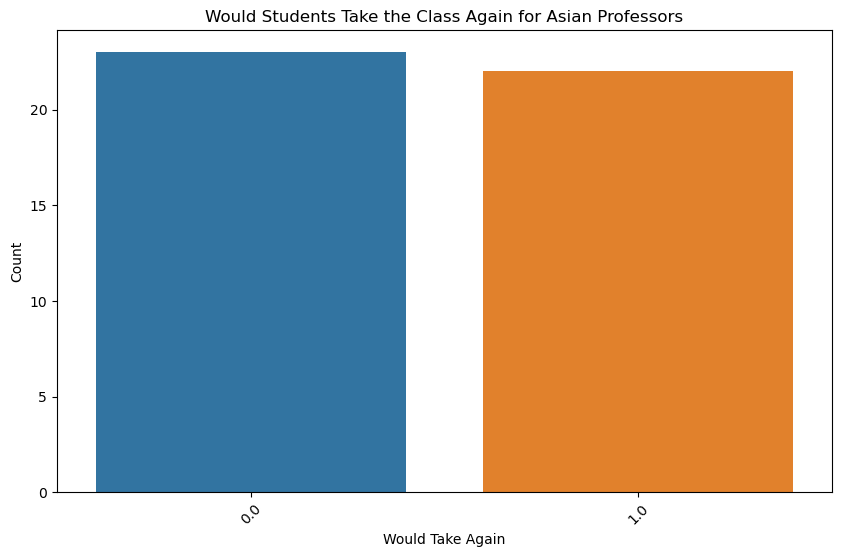

/Users/kritya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kritya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kritya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


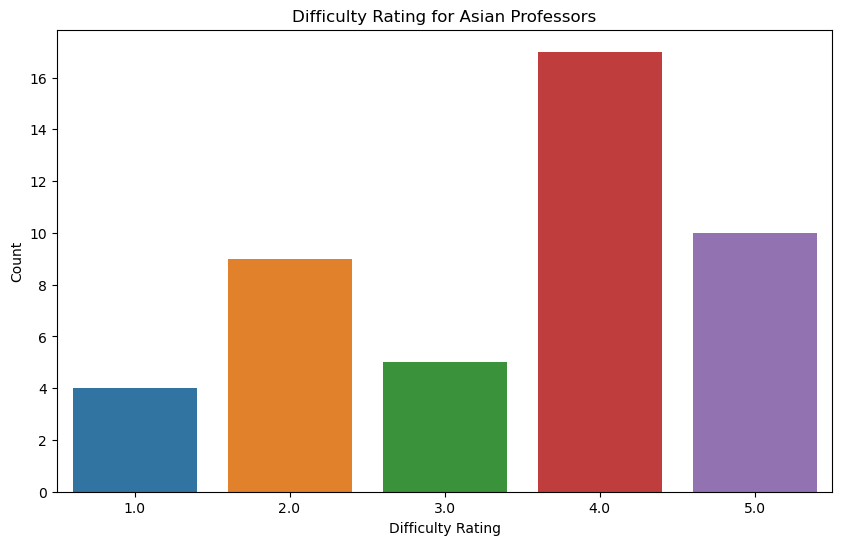

In [22]:
asian_professors_data = df[df['AsianProfessor'] == 'Yes']

tick_labels = {1: "Yes", 0: "No"}

plt.figure(figsize=(10, 6))
sns.countplot(x='wouldTakeAgain_Rating', data=asian_professors_data)
plt.title('Would Students Take the Class Again for Asian Professors')
plt.xlabel('Would Take Again')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='difficultyRating_Rating', data=asian_professors_data)
plt.title('Difficulty Rating for Asian Professors')
plt.xlabel('Difficulty Rating')
plt.ylabel('Count')
plt.show()

/Users/kritya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kritya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kritya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kritya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

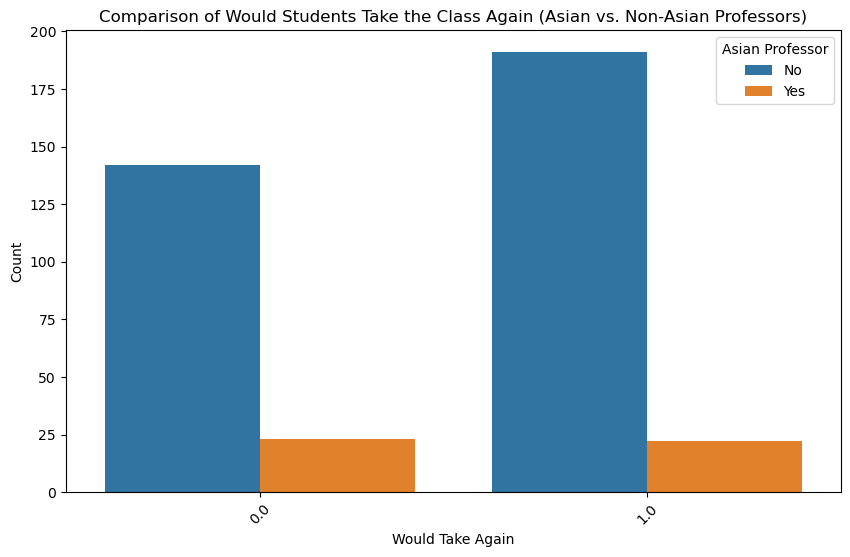

/Users/kritya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kritya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kritya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kritya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

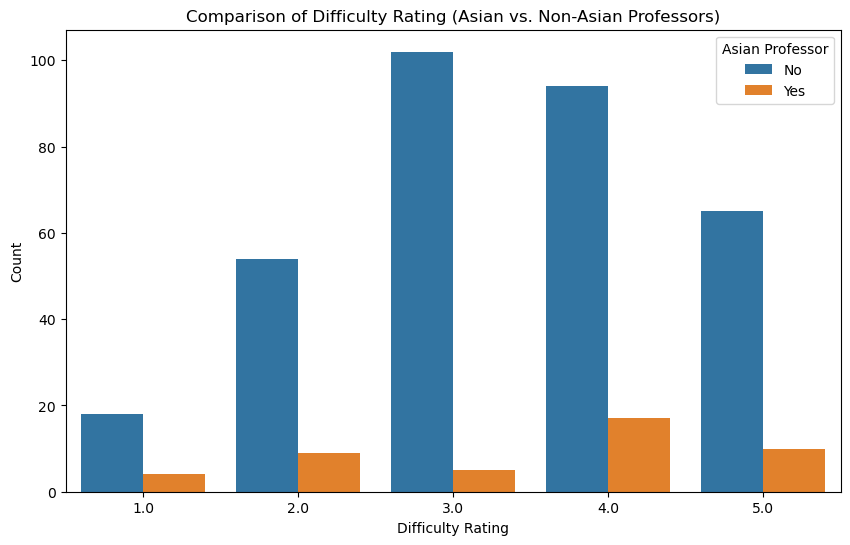

In [23]:
plt.figure(figsize=(10, 6))
tick_labels = {1: "Yes", 0: "No"}
sns.countplot(x='wouldTakeAgain_Rating', hue='AsianProfessor', data=df)
plt.title('Comparison of Would Students Take the Class Again (Asian vs. Non-Asian Professors)')
plt.xlabel('Would Take Again')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Asian Professor', loc='upper right')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='difficultyRating_Rating', hue='AsianProfessor', data=df)
plt.title('Comparison of Difficulty Rating (Asian vs. Non-Asian Professors)')
plt.xlabel('Difficulty Rating')
plt.ylabel('Count')
plt.legend(title='Asian Professor', loc='upper right')
plt.show()

In [24]:
# Set visualization style
sns.set_style("whitegrid")

# Define custom tick labels
tick_labels = {1: "Yes", 0: "No"}

# Plot the data
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df, x='University_Category', y='wouldTakeAgain_Rating', hue='University_Category', dodge=True, ci=None)
plt.title('Would Take Again Ratings by University')
plt.xlabel('University')
plt.ylabel('Average Would Take Again Rating')
plt.legend(title='University Category', loc='upper right')

# Add predicted gender and Asian professor as additional hues
sns.color_palette("colorblind")  # Use a colorblind-friendly palette
for i, gender in enumerate(df['predictedGender'].unique()):
    sns.barplot(data=df[df['predictedGender'] == gender], x='University_Category', y='wouldTakeAgain_Rating', hue='AsianProfessor',
                dodge=True, alpha=0.5, palette="Set2", ci=None)

# Set custom tick labels for the y-axis
ax.set_yticklabels([tick_labels[int(x.get_text())] for x in ax.get_yticklabels()])

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

/var/folders/p0/zvl7gz994b7bk8mzxm2d5sc00000gn/T/ipykernel_92476/4172456462.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, x='University_Category', y='wouldTakeAgain_Rating', hue='University_Category', dodge=True, ci=None)


ValueError: Could not interpret input 'University_Category'

<Figure size 1200x800 with 0 Axes>

/Users/kritya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kritya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kritya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


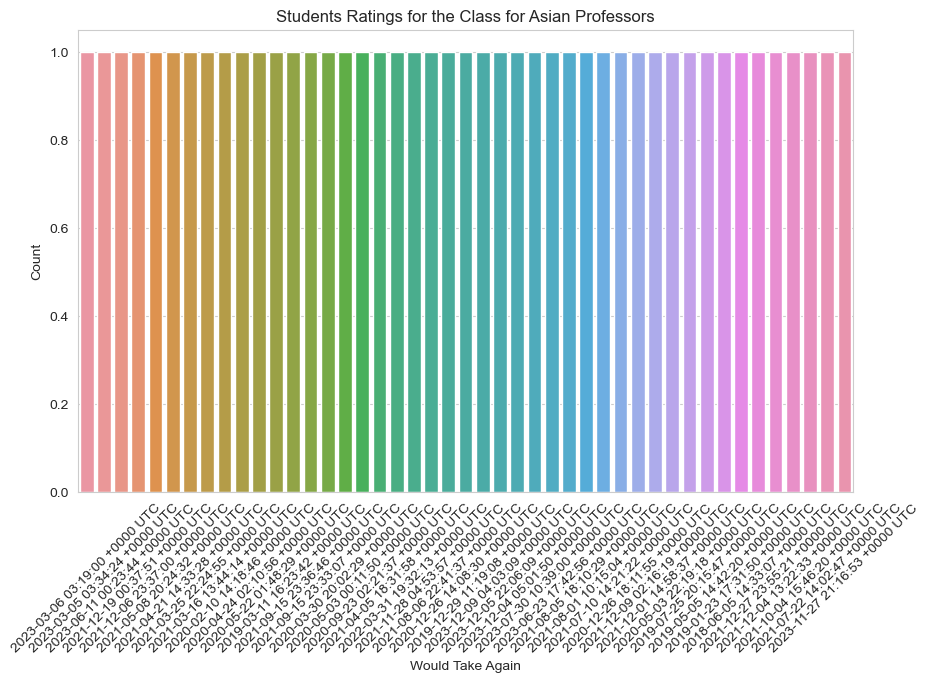

In [25]:
asian_professors_data = df[df['AsianProfessor'] == 'Yes']

tick_labels = {1: "Yes", 0: "No"}
plt.figure(figsize=(10, 6))
sns.countplot(x='adminReviewedAt_Rating', data=asian_professors_data)
plt.title('Students Ratings for the Class for Asian Professors')
plt.xlabel('Would Take Again')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/Users/kritya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kritya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kritya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kritya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

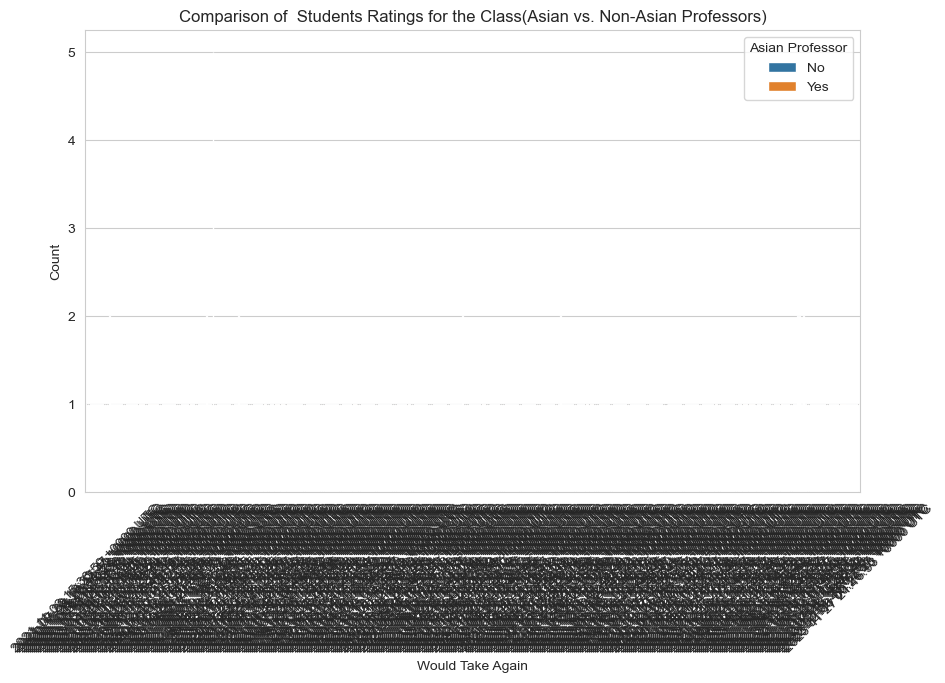

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='adminReviewedAt_Rating', hue='AsianProfessor', data=df)
plt.title('Comparison of  Students Ratings for the Class(Asian vs. Non-Asian Professors)')
plt.xlabel('Would Take Again')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Asian Professor', loc='upper right')
plt.show()

In [27]:

# Define preprocessing function with error handling
def preprocess_text(text):
    try:
        # Convert text to string if it's not already
        if not isinstance(text, str):
            text = str(text)
        # Tokenization
        tokens = word_tokenize(text)
        # Remove stop words
        stop_words = set(stopwords.words('english'))
        filtered_tokens = [word for word in tokens if word not in stop_words]
        # Remove punctuation
        filtered_tokens = [word for word in filtered_tokens if word not in string.punctuation]
        return filtered_tokens
    except Exception as e:
        # Handle unexpected data or exceptions
        print(f"Error preprocessing text: {e}")
        return []

# Preprocess comments
df['preprocessed_comments'] = df['comment_Rating'].apply(preprocess_text)



Error preprocessing text: name 'word_tokenize' is not defined
Error preprocessing text: name 'word_tokenize' is not defined
Error preprocessing text: name 'word_tokenize' is not defined
Error preprocessing text: name 'word_tokenize' is not defined
Error preprocessing text: name 'word_tokenize' is not defined
Error preprocessing text: name 'word_tokenize' is not defined
Error preprocessing text: name 'word_tokenize' is not defined
Error preprocessing text: name 'word_tokenize' is not defined
Error preprocessing text: name 'word_tokenize' is not defined
Error preprocessing text: name 'word_tokenize' is not defined
Error preprocessing text: name 'word_tokenize' is not defined
Error preprocessing text: name 'word_tokenize' is not defined
Error preprocessing text: name 'word_tokenize' is not defined
Error preprocessing text: name 'word_tokenize' is not defined
Error preprocessing text: name 'word_tokenize' is not defined
Error preprocessing text: name 'word_tokenize' is not defined
Error pr

In [28]:
df.head()

,__typename_Rating,adminReviewedAt_Rating,attendanceMandatory_Rating,clarityRating_Rating,class_Rating,comment_Rating,createdByUser_Rating,date_Rating,difficultyRating_Rating,flagStatus_Rating,...,thumbsUpTotal_Rating,wouldTakeAgain_Rating,ProfessorName,Department,SchoolName,LegacyId,NumRatings,predictedGender,AsianProfessor,preprocessed_comments
47383,Rating,2021-11-03 15:38:59 +0000 UTC,mandatory,4.0,MIE305,is this class hard absolutely be prepared to p...,False,2021-11-03 15:32:03 +0000 UTC,5.0,UNFLAGGED,...,2.0,1.0,John Kuzenski,Management,North Carolina State University,894586,185,Male,No,[]
47385,Rating,2021-09-20 19:23:37 +0000 UTC,mandatory,1.0,MIE305,imagine you walk into a class where the profes...,False,2021-09-20 19:21:31 +0000 UTC,5.0,UNFLAGGED,...,4.0,0.0,John Kuzenski,Management,North Carolina State University,894586,185,Male,No,[]
47388,Rating,2021-07-09 19:17:41 +0000 UTC,mandatory,1.0,MIE305,he is a sophist if you read some of his respon...,False,2021-07-09 19:09:42 +0000 UTC,4.0,UNFLAGGED,...,4.0,0.0,John Kuzenski,Management,North Carolina State University,894586,185,Male,No,[]
47403,Rating,2020-11-25 20:44:52 +0000 UTC,mandatory,1.0,MIE305,reading his reviews he clearly knows students ...,False,2020-11-25 20:43:54 +0000 UTC,5.0,UNFLAGGED,...,2.0,0.0,John Kuzenski,Management,North Carolina State University,894586,185,Male,No,[]
47404,Rating,2020-11-25 05:12:23 +0000 UTC,mandatory,4.0,MIE305,i got a which i was happy about because i fail...,False,2020-11-25 03:26:21 +0000 UTC,5.0,UNFLAGGED,...,1.0,1.0,John Kuzenski,Management,North Carolina State University,894586,185,Male,No,[]


In [29]:
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Assuming you have a DataFrame named df with a column 'comment_Rating' containing the comments and 'wouldTakeAgain_Rating' containing the scores

# Filter the dataset to include only records for Asian professors
asian_df = df[df['AsianProfessor'] == 'Yes']

# Filter further to include only records with low 'wouldTakeAgain_Rating' score
low_score_asian_df = asian_df[asian_df['wouldTakeAgain_Rating'] <= 2]

# Extract comments for these records
comments = low_score_asian_df['comment_Rating'].dropna()

# Tokenize the comments into individual words and preprocess them
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)
preprocessed_comments = []
for comment in comments:
    words = word_tokenize(comment.lower())
    filtered_words = [word for word in words if word not in stop_words and word not in punctuation]
    preprocessed_comments.extend(filtered_words)

# Count the frequency of each word
word_freq = Counter(preprocessed_comments)

# Get the most common words
most_common_words = word_freq.most_common(10)

print("Most common words for low 'would take again' score for Asian professors:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

Most common words for low 'would take again' score for Asian professors:
class: 53
professor: 19
lectures: 14
take: 12
assignments: 11
students: 11
hard: 10
really: 10
even: 8
online: 8


In [30]:
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Assuming you have a DataFrame named df with a column 'comment_Rating' containing the comments and 'wouldTakeAgain_Rating' containing the scores

# Filter the dataset to include only records for Asian professors
asian_df = df[df['AsianProfessor'] == 'Yes']

# Filter further to include only records with low 'wouldTakeAgain_Rating' score
low_score_asian_df = asian_df[asian_df['wouldTakeAgain_Rating'] <= 2]

# Extract comments for these records
comments = low_score_asian_df['comment_Rating'].dropna()

# Tokenize the comments into individual words and preprocess them
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)
preprocessed_comments = []
for comment in comments:
    words = word_tokenize(comment.lower())
    filtered_words = [word for word in words if word not in stop_words and word not in punctuation and ('not' in word or 'difficult' in word)]
    preprocessed_comments.extend(filtered_words)

# Count the frequency of each word
word_freq = Counter(preprocessed_comments)

# Get the most common negative words
most_common_words = word_freq.most_common(10)

print("Most common negative words for low 'would take again' score for Asian professors:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")


Most common negative words for low 'would take again' score for Asian professors:
difficult: 7
nothing: 2
notes: 1


In [31]:
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Assuming you have a DataFrame named df with a column 'comment_Rating' containing the comments and 'wouldTakeAgain_Rating' containing the scores

# Filter the dataset to include only records for Asian professors
asian_df = df[df['AsianProfessor'] == 'No']

# Filter further to include only records with low 'wouldTakeAgain_Rating' score
low_score_asian_df = asian_df[asian_df['wouldTakeAgain_Rating'] <= 2]

# Extract comments for these records
comments = low_score_asian_df['comment_Rating'].dropna()

# Tokenize the comments into individual words and preprocess them
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)
preprocessed_comments = []
for comment in comments:
    words = word_tokenize(comment.lower())
    filtered_words = [word for word in words if word not in stop_words and word not in punctuation]
    preprocessed_comments.extend(filtered_words)

# Count the frequency of each word
word_freq = Counter(preprocessed_comments)

# Get the most common words
most_common_words = word_freq.most_common(10)

print("Most common words for low 'would take again' score for non-Asian professors:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

Most common words for low 'would take again' score for non-Asian professors:
class: 323
professor: 169
students: 93
take: 79
lectures: 69
course: 65
really: 63
good: 61
assignments: 60
hard: 57


In [32]:
# Filter the dataset to include only records for non-Asian professors
non_asian_df = df[df['AsianProfessor'] == 'No']

# Filter further to include only records with low 'wouldTakeAgain_Rating' score
low_score_non_asian_df = non_asian_df[non_asian_df['wouldTakeAgain_Rating'] <= 2]

# Extract comments for these records
non_asian_comments = low_score_non_asian_df['comment_Rating'].dropna()

# Tokenize the comments into individual words and preprocess them
preprocessed_non_asian_comments = []
for comment in non_asian_comments:
    words = word_tokenize(comment.lower())
    filtered_words = [word for word in words if word not in stop_words and word not in punctuation and ('not' in word or 'difficult' in word)]
    preprocessed_non_asian_comments.extend(filtered_words)

# Count the frequency of each word
non_asian_word_freq = Counter(preprocessed_non_asian_comments)

# Get the most common negative words for non-Asian professors
non_asian_most_common_words = non_asian_word_freq.most_common(10)

print("\nMost common negative words for low 'would take again' score for non-Asian professors:")
for word, freq in non_asian_most_common_words:
    print(f"{word}: {freq}")


Most common negative words for low 'would take again' score for non-Asian professors:
difficult: 29
notes: 14
another: 8
nothing: 6
notebook: 1
notetaking: 1
monotone: 1
difficulty: 1


In [33]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
import string

# Define preprocessing function to extract phrases
def preprocess_text(text):
    try:
        # Convert text to string if it's not already
        if not isinstance(text, str):
            text = str(text)
        # Convert text to lowercase
        text_lower = text.lower()
        # Tokenization into phrases (bigrams)
        tokens = word_tokenize(text_lower)
        stop_words = set(stopwords.words('english'))
        filtered_tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
        phrases = list(ngrams(filtered_tokens, 2))  # Change the number to get different length phrases (e.g., 3 for trigrams)
        return phrases
    except Exception as e:
        # Handle unexpected data or exceptions
        print(f"Error preprocessing text: {e}")
        return []

# Preprocess comments
df['preprocessed_phrases'] = df['comment_Rating'].apply(preprocess_text)

In [34]:
def calculate_score(df):
    scores = {'Asian': {}, 'Non-Asian': {}}
    for index, row in df.iterrows():
        professor = row['ProfessorName']
        rating = row['wouldTakeAgain_Rating']
        comment = row['comment_Rating']
        is_asian = row['AsianProfessor']  # Corrected column name
        # Check if comment is not NaN
        if isinstance(comment, str):
            # Assign score based on negative comment
            score = -1 if 'not' in comment.lower() or 'difficult' in comment.lower() else 0
            # Update total score for professor
            if is_asian == 'Yes':
                if professor in scores['Asian']:
                    scores['Asian'][professor] += score
                else:
                    scores['Asian'][professor] = score
            else:
                if professor in scores['Non-Asian']:
                    scores['Non-Asian'][professor] += score
                else:
                    scores['Non-Asian'][professor] = score
    return scores
# Calculate scores for Asian and non-Asian professors
professor_scores = calculate_score(df)


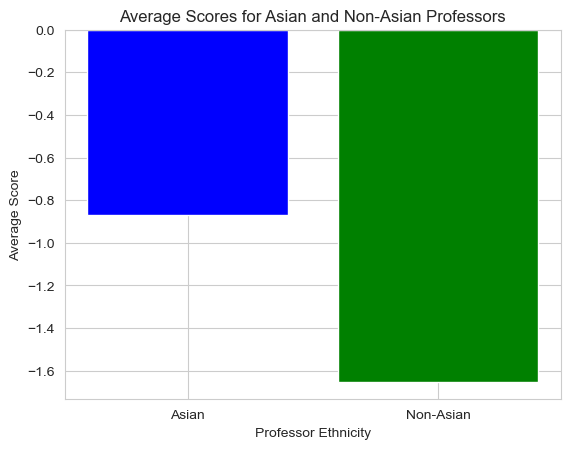

In [35]:
# Calculate average scores for Asian and non-Asian professors
avg_score_asian = sum(professor_scores['Asian'].values()) / len(professor_scores['Asian'])
avg_score_non_asian = sum(professor_scores['Non-Asian'].values()) / len(professor_scores['Non-Asian'])

# Plot overall average scores
plt.bar(['Asian', 'Non-Asian'], [avg_score_asian, avg_score_non_asian], color=['blue', 'green'])
plt.xlabel('Professor Ethnicity')
plt.ylabel('Average Score')
plt.title('Average Scores for Asian and Non-Asian Professors')
plt.show()

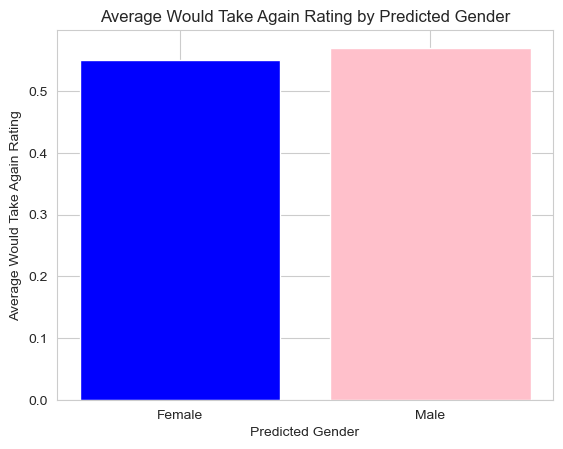

In [36]:
# Filter the dataset to include only records with non-null 'predictedGender' and 'wouldTakeAgain_Rating'
filtered_df = df.dropna(subset=['predictedGender', 'wouldTakeAgain_Rating'])

# Group by predicted gender and calculate the mean 'wouldTakeAgain_Rating' for each group
gender_avg_rating = filtered_df.groupby('predictedGender')['wouldTakeAgain_Rating'].mean()

# Plot the bar chart
plt.bar(gender_avg_rating.index, gender_avg_rating.values, color=['blue', 'pink', 'gray'])
plt.xlabel('Predicted Gender')
plt.ylabel('Average Would Take Again Rating')
plt.title('Average Would Take Again Rating by Predicted Gender')
plt.show()

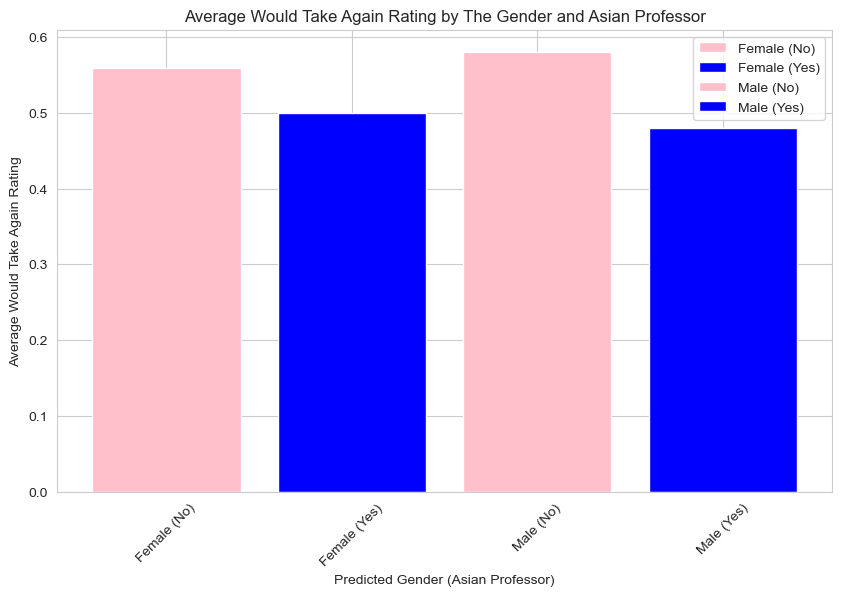

In [37]:
# Filter the dataset to include only records with non-null 'predictedGender', 'wouldTakeAgain_Rating', and 'AsianProfessor'
filtered_df = df.dropna(subset=['predictedGender', 'wouldTakeAgain_Rating', 'AsianProfessor'])

# Group by predicted gender and AsianProfessor, and calculate the mean 'wouldTakeAgain_Rating' for each group
gender_asian_avg_rating = filtered_df.groupby(['predictedGender', 'AsianProfessor'])['wouldTakeAgain_Rating'].mean()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over each category (gender and AsianProfessor)
for gender in gender_asian_avg_rating.index.levels[0]:
    for asian in gender_asian_avg_rating.index.levels[1]:
        avg_rating = gender_asian_avg_rating.loc[(gender, asian)]
        ax.bar(f'{gender} ({asian})', avg_rating, label=f'{gender} ({asian})', color='blue' if asian == 'Yes' else 'pink')

ax.set_xlabel('Predicted Gender (Asian Professor)')
ax.set_ylabel('Average Would Take Again Rating')
ax.set_title('Average Would Take Again Rating by The Gender and Asian Professor')
ax.legend()
plt.xticks(rotation=45)
plt.show()

In [38]:
df['Department'].nunique()

60

In [39]:
# Extract unique elements from a ProfessorName
unique_elements = df['ProfessorName'].unique()

# Create a new DataFrame with unique elements
prof_df = pd.DataFrame(unique_elements, columns=['UniqueProfessorNames'])

In [40]:
prof_df.count()

UniqueProfessorNames    112
dtype: int64

In [41]:
# Extract unique elements from department
unique_elements = df['Department'].unique()

# Create a new DataFrame with unique elements
dept_df = pd.DataFrame(unique_elements, columns=['Departments'])

In [42]:
dept_df.count()

Departments    60
dtype: int64

In [43]:
dept_df.head(50)

,Departments
0,Management
1,Hawaiian
2,Chemical Engineering
3,Biochemistry
4,Physical Education
5,Engineering
6,Electrical Engineering
7,Statistics
8,Languages
9,Biology


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

dept_df = pd.DataFrame(data)

# Define categories
categories = ['STEM', 'Business', 'Humanities', 'Others']

# Create a corpus where each document represents a category
corpus = {
    'STEM': 'science technology engineering mathematics',
    'Business': 'business marketing finance',
    'Humanities': 'philosophy languages literature history art anthropology music religion sociology',
    'Others': 'political'
}

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the corpus using TF-IDF vectorizer
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus.values())

# Get feature names (terms)
terms = tfidf_vectorizer.get_feature_names_out()

# Transform the categories using TF-IDF vectorizer
categories_tfidf = tfidf_vectorizer.transform(dept_df['Departments'])

# Find the most relevant category for each type
most_relevant_category_indices = categories_tfidf.argmax(axis=1).flatten()
most_relevant_categories = [categories[i] for i in most_relevant_category_indices]

# Add the most relevant category to the DataFrame
df['Relevant_Category'] = most_relevant_categories

NameError: name 'data' is not defined

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Define the categories for each group
STEM = ['Science','Computer Science', 'Mathematics', 'Chemistry', 'Engineering', 'Physics', 'Biology', 'Geology', 'Astronomy', 'Information Science', 'Electrical Engineering', 'Cognitive Science', 'Mechanical Engineering']
BUSINESS = ['Economics', 'Business', 'Finance', 'Marketing', 'International Studies', 'Criminal Justice']
HUMANITIES = ['Philosophy', 'Languages', 'Humanities', 'English', 'History', 'Theology', 'Art History', 'Anthropology', 'Linguistics', 'Literature', 'Classics', 'Religious Studies', 'Religion', 'Comparative Literature', 'Fine Arts', 'Music', 'Geography', 'Sociology', 'Social Work', 'Near Eastern Studies', 'Political Science', 'Social Science', 'History']
OTHERS = ['Culinary Arts', 'Psychology', 'Education', 'Health Science', 'Communication', 'Technology', 'Film','Music']

# Combine all categories
all_categories = STEM + BUSINESS + HUMANITIES + OTHERS

# Create a DataFrame with categories
category_df = pd.DataFrame({'Departments': all_categories})

# Define the labels for each category
category_labels = ['STEM'] * len(STEM) + ['BUSINESS'] * len(BUSINESS) + ['HUMANITIES'] * len(HUMANITIES) + ['OTHERS'] * len(OTHERS)

# Add the labels to the DataFrame
category_df['Category'] = category_labels

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Vectorize the department names from the first 50 records in dept_df
X_train = tfidf_vectorizer.fit_transform(dept_df['Departments'][:50])

# Encode the category labels for the first 50 records
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(category_df['Category'])

# Train a Support Vector Machine (SVM) classifier on the first 50 records
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Predict categories for the first 50 records
predicted_categories_train = svm_classifier.predict(X_train)

# Map the predicted categories back to the department names for the first 50 records
predicted_category_labels_train = label_encoder.inverse_transform(predicted_categories_train)

# Add the predicted categories to the original DataFrame for the first 50 records
dept_df['Predicted_Category'] = predicted_category_labels_train[:50]

# Calculate accuracy for the first 50 records
accuracy_train = accuracy_score(y_train, predicted_categories_train)

# Display the accuracy for the first 50 records
print(f"Accuracy for the first 50 records: {accuracy_train}")

# Vectorize the department names from the remaining 1200 records in dept_df
X_test = tfidf_vectorizer.transform(dept_df['Departments'][50:])

# Predict categories for the remaining 1200 records
predicted_categories_test = svm_classifier.predict(X_test)

# Map the predicted categories back to the department names for the remaining 1200 records
predicted_category_labels_test = label_encoder.inverse_transform(predicted_categories_test)

# Add the predicted categories to the original DataFrame for the remaining 1200 records
dept_df['Predicted_Category'][50:] = predicted_category_labels_test

# Display the resulting DataFrame with the predicted categories
print(dept_df)


/Users/kritya/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/kritya/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


ValueError: Length of values (50) does not match length of index (60)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Define the categories for each group
STEM = ['Science','Computer Science', 'Mathematics', 'Chemistry', 'Engineering', 'Physics', 'Biology', 'Geology', 'Astronomy', 'Information Science', 'Electrical Engineering', 'Cognitive Science', 'Mechanical Engineering']
BUSINESS = ['Economics', 'Business', 'Finance', 'Marketing', 'International Studies', 'Criminal Justice']
HUMANITIES = ['Philosophy', 'Languages', 'Humanities', 'English', 'History', 'Theology', 'Art History', 'Anthropology', 'Linguistics', 'Literature', 'Classics', 'Religious Studies', 'Religion', 'Comparative Literature', 'Fine Arts', 'Music', 'Geography', 'Sociology', 'Social Work', 'Near Eastern Studies', 'Political Science', 'Social Science', 'History']
OTHERS = ['Culinary Arts', 'Psychology', 'Education', 'Health Science', 'Communication', 'Technology', 'Film','Music']

# Combine all categories
all_categories = STEM + BUSINESS + HUMANITIES + OTHERS

# Create a DataFrame with categories
category_df = pd.DataFrame({'Departments': all_categories})

# Define the labels for each category
category_labels = ['STEM'] * len(STEM) + ['BUSINESS'] * len(BUSINESS) + ['HUMANITIES'] * len(HUMANITIES) + ['OTHERS'] * len(OTHERS)

# Add the labels to the DataFrame
category_df['Category'] = category_labels

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Vectorize the department names from the first 50 records in dept_df
X_train = tfidf_vectorizer.fit_transform(dept_df['Departments'][:50])

# Encode the category labels for the first 50 records
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(category_df['Category'])

# Train a Support Vector Machine (SVM) classifier on the first 50 records
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Predict categories for the first 50 records
predicted_categories_train = svm_classifier.predict(X_train)

# Map the predicted categories back to the department names for the first 50 records
predicted_category_labels_train = label_encoder.inverse_transform(predicted_categories_train)

# Add the predicted categories to the original DataFrame for the first 50 records
dept_df['Predicted_Category'][:50] = predicted_category_labels_train

# Calculate accuracy for the first 50 records
accuracy_train = accuracy_score(y_train, predicted_categories_train)

# Display the accuracy for the first 50 records
print(f"Accuracy for the first 50 records: {accuracy_train}")

# Vectorize the department names from the remaining 1200 records in dept_df
X_test = tfidf_vectorizer.transform(dept_df['Departments'][50:])

# Predict categories for the remaining 1200 records
predicted_categories_test = svm_classifier.predict(X_test)

# Map the predicted categories back to the department names for the remaining 1200 records
predicted_category_labels_test = label_encoder.inverse_transform(predicted_categories_test)

# Add the predicted categories to the original DataFrame for the remaining 1200 records
dept_df['Predicted_Category'][50:] = predicted_category_labels_test

# Display the resulting DataFrame with the predicted categories
print(dept_df)


In [ ]:
dept_df.count()

In [46]:
category_counts = dept_df['Predicted_Category'].value_counts()

# Print the total count of each category
print(category_counts)

KeyError: 'Predicted_Category'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Define the categories for each group
STEM = ['Science','Computer Science', 'Mathematics', 'Chemistry', 'Engineering', 'Physics', 'Biology', 'Geology', 'Astronomy', 'Information Science', 'Electrical Engineering', 'Cognitive Science', 'Mechanical Engineering']
BUSINESS = ['Economics', 'Business', 'Finance', 'Marketing', 'International Studies', 'Criminal Justice']
HUMANITIES = ['Philosophy', 'Languages', 'Humanities', 'English', 'History', 'Theology', 'Art History', 'Anthropology', 'Linguistics', 'Literature', 'Classics', 'Religious Studies', 'Religion', 'Comparative Literature', 'Fine Arts', 'Music', 'Geography', 'Sociology', 'Social Work', 'Near Eastern Studies', 'Political Science', 'Social Science', 'History']
OTHERS = ['Culinary Arts', 'Psychology', 'Education', 'Health Science', 'Communication', 'Technology', 'Film','Music']

# Combine all categories
all_categories = STEM + BUSINESS + HUMANITIES + OTHERS

# Create a DataFrame with categories
category_df = pd.DataFrame({'Department': all_categories})

# Define the labels for each category
category_labels = ['STEM'] * len(STEM) + ['BUSINESS'] * len(BUSINESS) + ['HUMANITIES'] * len(HUMANITIES) + ['OTHERS'] * len(OTHERS)

# Add the labels to the DataFrame
category_df['Category'] = category_labels
category_df

In [47]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Vectorize the department names from the first 50 records in df
X_train = tfidf_vectorizer.fit_transform(df['Department'][:50])

# Encode the category labels for the first 50 records
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(category_df['Category'])

# Train a Support Vector Machine (SVM) classifier on the first 50 records
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Predict categories for the first 50 records
predicted_categories_train = svm_classifier.predict(X_train)

# Map the predicted categories back to the department names for the first 50 records
predicted_category_labels_train = label_encoder.inverse_transform(predicted_categories_train)

# Create the 'Predicted_Category' column in the DataFrame for the first 50 records
df['Predicted_Category'] = ''

# Add the predicted categories to the 'Predicted_Category' column for the first 50 records
df.loc[:49, 'Predicted_Category'] = predicted_category_labels_train

# Calculate accuracy for the first 50 records
accuracy_train = accuracy_score(y_train, predicted_categories_train)

# Display the accuracy for the first 50 records
print(f"Accuracy for the first 50 records: {accuracy_train}")

# Vectorize the department names from the remaining 1200 records in df
X_test = tfidf_vectorizer.transform(df['Department'][50:])

# Predict categories for the remaining 1200 records
predicted_categories_test = svm_classifier.predict(X_test)

# Map the predicted categories back to the department names for the remaining 1200 records
predicted_category_labels_test = label_encoder.inverse_transform(predicted_categories_test)

# Add the predicted categories to the 'Predicted_Category' column for the remaining 1200 records
df.loc[50:, 'Predicted_Category'] = predicted_category_labels_test

# Display the resulting DataFrame with the predicted categories
df.head(10)


/Users/kritya/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/kritya/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


ValueError: Must have equal len keys and value when setting with an iterable

In [48]:
df.count()

__typename_Rating             378
adminReviewedAt_Rating        378
attendanceMandatory_Rating    378
clarityRating_Rating          378
class_Rating                  378
comment_Rating                378
createdByUser_Rating          378
date_Rating                   378
difficultyRating_Rating       378
flagStatus_Rating             378
grade_Rating                  378
helpfulRating_Rating          378
id_Rating                     378
isForCredit_Rating            378
isForOnlineClass_Rating       378
legacyId_Rating               378
ratingTags_Rating             378
teacherNote_Rating            378
textbookUse_Rating            378
thumbs_Rating                 378
thumbsDownTotal_Rating        378
thumbsUpTotal_Rating          378
wouldTakeAgain_Rating         378
ProfessorName                 378
Department                    378
SchoolName                    378
LegacyId                      378
NumRatings                    378
predictedGender               378
AsianProfessor

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Define the categories for each group
STEM = ['Science', 'Computer Science','Geography','Technology','Mathematics', 'Chemistry', 'Engineering', 'Physics', 'Biology', 'Geology', 'Astronomy', 'Information Science', 'Electrical Engineering', 'Cognitive Science', 'Mechanical Engineering','Engineering','chemistry']
BUSINESS = ['Economics', 'Business', 'Finance', 'Marketing', 'International Studies', 'Criminal Justice','Accounts','Human Resources','Management']
HUMANITIES = ['Philosophy', 'Languages', 'Humanities', 'English', 'History', 'Theology', 'Art History','Classics', 'Anthropology', 'Linguistics', 'Literature', 'Religious Studies','Linguistics', 'Classics','Literature', 'Religion', 'Comparative Literature']
OTHERS = ['Culinary Arts', 'Psychology', 'Education', 'Health Science', 'Communication', 'Technology', 'Film']

# Combine all categories
all_categories = STEM + BUSINESS + HUMANITIES + OTHERS

# Create a DataFrame with categories
category_df = pd.DataFrame({'Department': all_categories})

# Define the labels for each category
category_labels = ['STEM'] * len(STEM) + ['BUSINESS'] * len(BUSINESS) + ['HUMANITIES'] * len(HUMANITIES) + ['OTHERS'] * len(OTHERS)

# Add the labels to the DataFrame
category_df['Category'] = category_labels

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Vectorize the department names from the first 50 records in df
X_train = tfidf_vectorizer.fit_transform(df['Department'][:50])

# Encode the category labels for the first 50 records
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(category_df['Category'])

# Train a Support Vector Machine (SVM) classifier on the first 50 records
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Predict categories for the first 50 records
predicted_categories_train = svm_classifier.predict(X_train)

# Map the predicted categories back to the department names for the first 50 records
predicted_category_labels_train = label_encoder.inverse_transform(predicted_categories_train)

# Create the 'Predicted_Category' column in the DataFrame for the first 50 records
df['Predicted_Category'] = ''

# Add the predicted categories to the 'Predicted_Category' column for the first 50 records
df.loc[:49, 'Predicted_Category'] = predicted_category_labels_train

# Calculate accuracy for the first 50 records
accuracy_train = accuracy_score(y_train, predicted_categories_train)

# Display the accuracy for the first 50 records
print(f"Accuracy for the first 50 records: {accuracy_train}")

# Vectorize the department names from the remaining 1200 records in df
X_test = tfidf_vectorizer.transform(df['Department'][50:])

# Predict categories for the remaining 1200 records
predicted_categories_test = svm_classifier.predict(X_test)

# Map the predicted categories back to the department names for the remaining 1200 records
predicted_category_labels_test = label_encoder.inverse_transform(predicted_categories_test)

# Add the predicted categories to the 'Predicted_Category' column for the remaining 1200 records
df.loc[50:, 'Predicted_Category'] = predicted_category_labels_test

# Display the resulting DataFrame with the predicted categories
df.head(10)


/Users/kritya/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/kritya/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


ValueError: Must have equal len keys and value when setting with an iterable

In [50]:
category_counts = df['Predicted_Category'].value_counts()

# Print the total count of each category
print(category_counts)

Predicted_Category
    378
Name: count, dtype: int64


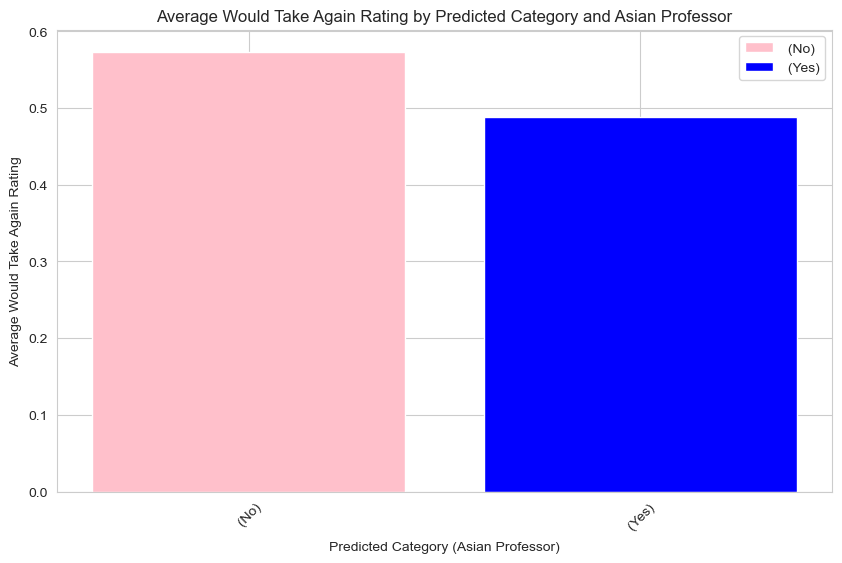

In [51]:
import matplotlib.pyplot as plt

# Filter the dataset to include only records with non-null 'Predicted_Category', 'wouldTakeAgain_Rating', and 'AsianProfessor'
filtered_df = df.dropna(subset=['Predicted_Category', 'wouldTakeAgain_Rating', 'AsianProfessor'])

# Group by predicted category and AsianProfessor, and calculate the mean 'wouldTakeAgain_Rating' for each group
category_asian_avg_rating = filtered_df.groupby(['Predicted_Category', 'AsianProfessor'])['wouldTakeAgain_Rating'].mean()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over each category (predicted category and AsianProfessor)
for category in category_asian_avg_rating.index.levels[0]:
    for asian in category_asian_avg_rating.index.levels[1]:
        avg_rating = category_asian_avg_rating.loc[(category, asian)]
        ax.bar(f'{category} ({asian})', avg_rating, label=f'{category} ({asian})', color='blue' if asian == 'Yes' else 'pink')

ax.set_xlabel('Predicted Category (Asian Professor)')
ax.set_ylabel('Average Would Take Again Rating')
ax.set_title('Average Would Take Again Rating by Predicted Category and Asian Professor')
ax.legend()
plt.xticks(rotation=45)
plt.show()


StopIteration: 

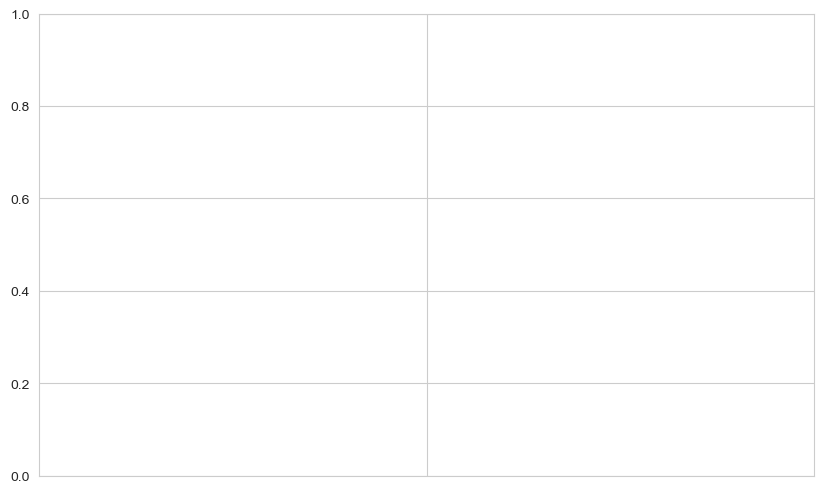

In [52]:
# Filter the dataset to include only records with non-null 'Predicted_Category' and 'wouldTakeAgain_Rating'
filtered_df = df.dropna(subset=['Predicted_Category', 'wouldTakeAgain_Rating'])

# Group by predicted category and calculate the mean 'wouldTakeAgain_Rating' for each group
category_avg_rating = filtered_df.groupby('Predicted_Category')['wouldTakeAgain_Rating'].mean()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over each predicted category
for category in category_avg_rating.index:
    avg_rating = category_avg_rating.loc[category]
    ax.bar(category, avg_rating, label=category)

ax.set_xlabel('Predicted Category')
ax.set_ylabel('Average Would Take Again Rating')
ax.set_title('Average Would Take Again Rating by Predicted Category')
ax.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Filter the dataset to include only records with non-null 'Predicted_Category', 'wouldTakeAgain_Rating', 'Gender', and 'AsianProfessor'
filtered_df = df.dropna(subset=['Predicted_Category', 'wouldTakeAgain_Rating', 'predictedGender'])

# Group by predicted category, gender, and calculate the mean 'wouldTakeAgain_Rating' for each group
category_gender_avg_rating = filtered_df.groupby(['Predicted_Category', 'predictedGender'])['wouldTakeAgain_Rating'].mean()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate over each predicted category and gender combination
for category, gender in category_gender_avg_rating.index:
    avg_rating = category_gender_avg_rating.loc[(category, gender)]
    ax.bar(f'{category} - {gender}', avg_rating, label=f'{category} - {gender}')

ax.set_xlabel('Predicted Category - Gender')
ax.set_ylabel('Average Would Take Again Rating')
ax.set_title('Average Would Take Again Rating by Predicted Category and Gender')
ax.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Filter the dataset to include only records with non-null 'Predicted_Category', 'wouldTakeAgain_Rating', 'Gender', and 'AsianProfessor'
filtered_df = df.dropna(subset=['Predicted_Category', 'wouldTakeAgain_Rating', 'predictedGender', 'AsianProfessor'])

# Group by predicted category, gender, AsianProfessor and calculate the mean 'wouldTakeAgain_Rating' for each group
category_gender_asian_avg_rating = filtered_df.groupby(['Predicted_Category', 'predictedGender', 'AsianProfessor'])['wouldTakeAgain_Rating'].mean()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate over each predicted category, gender, and AsianProfessor combination
for category, gender, asian in category_gender_asian_avg_rating.index:
    avg_rating = category_gender_asian_avg_rating.loc[(category, gender, asian)]
    ax.bar(f'{category} - {gender} - {asian}', avg_rating, label=f'{category} - {gender} - {asian}')

ax.set_xlabel('Predicted Category - Gender - AsianProfessor')
ax.set_ylabel('Average Would Take Again Rating')
ax.set_title('Average Would Take Again Rating by Predicted Category, Gender, and AsianProfessor')
ax.legend()
plt.xticks(rotation=45)
plt.show()

In [53]:
import pandas as pd

# Data
universities_data = [
    {"Rank": 1, "University": "Massachusetts Institute of Technology (MIT)", "Type": "Private"},
    {"Rank": 2, "University": "Harvard University", "Type": "Private"},
    {"Rank": 3, "University": "Stanford University", "Type": "Private"},
    {"Rank": 4, "University": "University of California Berkeley (UCB)", "Type": "Public"},
    {"Rank": 5, "University": "University of Chicago", "Type": "Private"},
    {"Rank": 6, "University": "University of Pennsylvania", "Type": "Private"},
    {"Rank": 7, "University": "Cornell University", "Type": "Private"},
    {"Rank": 8, "University": "California Institute of Technology (Caltech)", "Type": "Private"},
    {"Rank": 9, "University": "Yale University", "Type": "Private"},
    {"Rank": 10, "University": "Princeton University", "Type": "Private"},
    {"Rank": 11, "University": "Columbia University", "Type": "Private"},
    {"Rank": 12, "University": "Johns Hopkins University", "Type": "Private"},
    {"Rank": 13, "University": "University of California, Los Angeles (UCLA)", "Type": "Public"},
    {"Rank": 14, "University": "University of Michigan-Ann Arbor", "Type": "Public"},
    {"Rank": 15, "University": "New York University (NYU)", "Type": "Private"},
    {"Rank": 16, "University": "Northwestern University", "Type": "Private"},
    {"Rank": 17, "University": "Carnegie Mellon University", "Type": "Private"},
    {"Rank": 18, "University": "Duke University", "Type": "Private"},
    {"Rank": 19, "University": "University of Texas at Austin", "Type": "Public"},
    {"Rank": 20, "University": "University of California, San Diego (UCSD)", "Type": "Public"},
    {"Rank": 21, "University": "University of Washington", "Type": "Public"},
    {"Rank": 22, "University": "University of Illinois at Urbana-Champaign", "Type": "Public"},
    {"Rank": 23, "University": "Brown University", "Type": "Private"},
    {"Rank": 24, "University": "Pennsylvania State University", "Type": "Public"},
    {"Rank": 25, "University": "Boston University", "Type": "Private"},
    {"Rank": 26, "University": "Georgia Institute of Technology (Georgia Tech)", "Type": "Public"},
    {"Rank": 27, "University": "Purdue University", "Type": "Public"},
    {"Rank": 28, "University": "University of Wisconsin-Madison", "Type": "Public"},
    {"Rank": 29, "University": "University of Southern California", "Type": "Private"},
    {"Rank": 30, "University": "University of California, Davis (UCD)", "Type": "Public"},
    {"Rank": 30, "University": "University of North Carolina, Chapel Hill", "Type": "Public"},
    {"Rank": 32, "University": "Texas A&M University", "Type": "Public"},
    {"Rank": 33, "University": "Michigan State University", "Type": "Public"},
    {"Rank": 34, "University": "Rice University", "Type": "Private"},
    {"Rank": 35, "University": "Ohio State University", "Type": "Public"},
    {"Rank": 36, "University": "Washington University in St. Louis", "Type": "Private"},
    {"Rank": 37, "University": "University of California, Santa Barbara (UCSB)", "Type": "Public"},
    {"Rank": 38, "University": "University of Florida", "Type": "Public"},
    {"Rank": 39, "University": "University of Maryland, College Park", "Type": "Public"},
    {"Rank": 40, "University": "Arizona State University", "Type": "Public"},
    {"Rank": 41, "University": "University of Minnesota, Twin Cities", "Type": "Public"},
    {"Rank": 42, "University": "Emory University", "Type": "Private"},
    {"Rank": 43, "University": "University of Pittsburgh", "Type": "Public"},
    {"Rank": 44, "University": "University of Rochester", "Type": "Private"},
    {"Rank": 45, "University": "Dartmouth College", "Type": "Private"},
    {"Rank": 46, "University": "University of Massachusetts, Amherst", "Type": "Public"},
    {"Rank": 47, "University": "Case Western Reserve University", "Type": "Private"},
    {"Rank": 48, "University": "University of Virginia", "Type": "Public"},
    {"Rank": 49, "University": "Vanderbilt University", "Type": "Private"},
    {"Rank": 50, "University": "University of Colorado at Boulder", "Type": "Public"},
    {"Rank": 51, "University": "University of California, Irvine (UCI)", "Type": "Public"},
    {"Rank": 52, "University": "North Carolina State University", "Type": "Public"},
    {"Rank": 53, "University": "University of Miami", "Type": "Private"},
    {"Rank": 54, "University": "University of Arizona", "Type": "Public"},
    {"Rank": 55, "University": "Georgetown University", "Type": "Private"},
    {"Rank": 56, "University": "Rutgers - The State University of New Jersey, New Brunswick", "Type": "Public"},
    {"Rank": 57, "University": "Virginia Polytechnic Institute (Virginia Tech)", "Type": "Public"},
    {"Rank": 58, "University": "University of Notre Dame", "Type": "Private"},
    {"Rank": 59, "University": "Indiana University Bloomington", "Type": "Public"},
    {"Rank": 60, "University": "University of Illinois, Chicago (UIC)", "Type": "Public"},
    {"Rank": 61, "University": "University of California, Santa Cruz (UCSC)", "Type": "Public"},
    {"Rank": 62, "University": "George Washington University", "Type": "Private"},
    {"Rank": 63, "University": "Yeshiva University", "Type": "Private"},
    {"Rank": 64, "University": "Northeastern University", "Type": "Private"},
    {"Rank": 65, "University": "Tufts University", "Type": "Private"},
    {"Rank": 66, "University": "University of Hawai'i at Manoa", "Type": "Public"},
    {"Rank": 67, "University": "Stony Brook University", "Type": "Public"},
    {"Rank": 68, "University": "Iowa State University", "Type": "Public"},
    {"Rank": 69, "University": "University of California, Riverside (UCR)", "Type": "Public"},
    {"Rank": 70, "University": "Colorado State University", "Type": "Public"},
    {"Rank": 71, "University": "University of Kansas", "Type": "Public"},
    {"Rank": 72, "University": "Washington State University", "Type": "Public"},
    {"Rank": 73, "University": "University of Utah", "Type": "Public"},
    {"Rank": 74, "University": "University of Connecticut", "Type": "Public"},
    {"Rank": 75, "University": "University of Tennessee, Knoxville", "Type": "Public"},
    {"Rank": 76, "University": "Florida State University", "Type": "Public"},
    {"Rank": 77, "University": "Colorado School of Mines", "Type": "Public"},
    {"Rank": 78, "University": "Illinois Institute of Technology", "Type": "Private"},
    {"Rank": 79, "University": "Missouri University of Science and Technology", "Type": "Public"},
    {"Rank": 80, "University": "University at Buffalo SUNY", "Type": "Public"},
    {"Rank": 80, "University": "University of Iowa", "Type": "Public"},
    {"Rank": 82, "University": "Rensselaer Polytechnic Institute", "Type": "Private"},
    {"Rank": 83, "University": "University of Delaware", "Type": "Public"},
    {"Rank": 84, "University": "Oregon State University", "Type": "Public"},
    {"Rank": 85, "University": "University of Georgia", "Type": "Public"},
    {"Rank": 86, "University": "University of Texas Dallas", "Type": "Public"},
    {"Rank": 87, "University": "City University of New York", "Type": "Public"},
    {"Rank": 88, "University": "Lehigh University", "Type": "Private"},
    {"Rank": 89, "University": "University of Nebraska - Lincoln", "Type": "Public"},
    {"Rank": 90, "University": "Florida International University", "Type": "Public"},
    {"Rank": 91, "University": "University of South Florida", "Type": "Public"},
    {"Rank": 92, "University": "University of South Carolina", "Type": "Public"},
    {"Rank": 93, "University": "University of Missouri, Columbia", "Type": "Public"},
    {"Rank": 94, "University": "University of Central Florida", "Type": "Public"},
    {"Rank": 95, "University": "Tulane University", "Type": "Private"},
    {"Rank": 96, "University": "Drexel University", "Type": "Private"},
    {"Rank": 97, "University": "Stevens Institute of Technology", "Type": "Private"},
    {"Rank": 98, "University": "Boston College", "Type": "Private"},
    {"Rank": 98, "University": "University of New Mexico", "Type": "Public"},
    {"Rank": 100, "University": "New Jersey Institute of Technology (NJIT)", "Type": "Public"},
    {"Rank": 100, "University": "The New School", "Type": "Private"},
    {"Rank": 100, "University": "University of Houston", "Type": "Public"},
    {"Rank": 100, "University": "University of Oklahoma", "Type": "Public"}
]

# Convert the list of dictionaries into a DataFrame
universities_df = pd.DataFrame(universities_data)

# Function to categorize universities as public or private based on their names
def categorize_university(university_name):
    # List of keywords indicating public universities
    public_keywords = ["University of", "State University", "Institute of Technology", "Polytechnic Institute", "City University"]
    # Check if any keyword indicating public university exists in the university name
    if any(keyword in university_name for keyword in public_keywords):
        return "Public"
    else:
        return "Private"

# Add another column to categorize the universities as public or private
universities_df['Category'] = universities_df['University'].apply(categorize_university)

# Display the DataFrame
print(universities_df)


     Rank                                   University     Type Category
0       1  Massachusetts Institute of Technology (MIT)  Private   Public
1       2                           Harvard University  Private  Private
2       3                          Stanford University  Private  Private
3       4      University of California Berkeley (UCB)   Public   Public
4       5                        University of Chicago  Private   Public
..    ...                                          ...      ...      ...
98     98                     University of New Mexico   Public   Public
99    100    New Jersey Institute of Technology (NJIT)   Public   Public
100   100                               The New School  Private  Private
101   100                        University of Houston   Public   Public
102   100                       University of Oklahoma   Public   Public

[103 rows x 4 columns]


In [54]:
# List of university names from the provided data
public_universities = [
    "University of California Berkeley (UCB)",
    "University of California, Los Angeles (UCLA)",
    "University of California, Davis (UCD)",
    "University of California, San Diego (UCSD)",
    "University of California, Santa Barbara (UCSB)",
    "University of Illinois at Urbana-Champaign",
    "University of Texas at Austin",
    "University of Washington",
    "University of Wisconsin-Madison",
    "Pennsylvania State University",
    "Michigan State University",
    "Ohio State University",
    "University of North Carolina, Chapel Hill",
    "Texas A&M University",
    "Washington University in St. Louis",
    "University of Florida",
    "University of Maryland, College Park",
    "Arizona State University",
    "University of Minnesota, Twin Cities",
    "University of Pittsburgh",
    "University of Massachusetts, Amherst",
    "University of California, Riverside (UCR)",
    "University of Colorado at Boulder",
    "University of California, Irvine (UCI)",
    "North Carolina State University",
    "University of Arizona",
    "University of Georgia",
    "University of California, Santa Cruz (UCSC)",
    "University of Hawai'i at Manoa",
    "Stony Brook University",
    "University of California, Riverside (UCR)",
    "Iowa State University",
    "Colorado State University",
    "University of Kansas",
    "Washington State University",
    "University of Utah",
    "University of Connecticut",
    "University of Tennessee, Knoxville",
    "Florida State University",
    "Colorado School of Mines",
    "Missouri University of Science and Technology",
    "University at Buffalo SUNY",
    "University of Iowa",
    "University of Delaware",
    "Oregon State University",
    "University of Texas Dallas",
    "City University of New York"
]

# Function to categorize universities as public or private
def categorize_university(university_name):
    if any(public_uni in university_name for public_uni in public_universities):
        return "Public"
    else:
        return "Private"

# Add a new column 'University_Category' to df
df['University_Category'] = df['SchoolName'].apply(categorize_university)

# Display the updated DataFrame
print(df[['SchoolName', 'University_Category']].head(50))


                             SchoolName University_Category
47383   North Carolina State University              Public
47385   North Carolina State University              Public
47388   North Carolina State University              Public
47403   North Carolina State University              Public
47404   North Carolina State University              Public
47406   North Carolina State University              Public
47408   North Carolina State University              Public
47411   North Carolina State University              Public
47413   North Carolina State University              Public
47415   North Carolina State University              Public
47418   North Carolina State University              Public
47419   North Carolina State University              Public
47420   North Carolina State University              Public
47424   North Carolina State University              Public
83756     University of Hawaii at Manoa             Private
83765     University of Hawaii at Manoa 

In [55]:
category_counts = df['SchoolName'].value_counts()

# Print the total count of each category
print(category_counts)

SchoolName
Florida International University                   40
Grand Canyon University                            27
Brigham Young University - Idaho                   27
University of Alabama                              22
University at Buffalo (SUNY Buffalo)               17
University of New Mexico                           15
North Carolina State University                    14
The University of Texas at Dallas                  14
Auburn University                                  14
CUNY Queens College                                14
Clemson University                                 14
University of Central Florida                      13
Brigham Young University                           13
University of Houston                              12
Iowa State University                              10
George Mason University                             9
Colorado School of Mines                            8
Georgetown University                               7
University of Iow

In [56]:
df['University_Category'].nunique()

2

/var/folders/p0/zvl7gz994b7bk8mzxm2d5sc00000gn/T/ipykernel_92476/3173743887.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='University_Category', y='wouldTakeAgain_Rating', ci=None)
/Users/kritya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kritya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kritya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype)

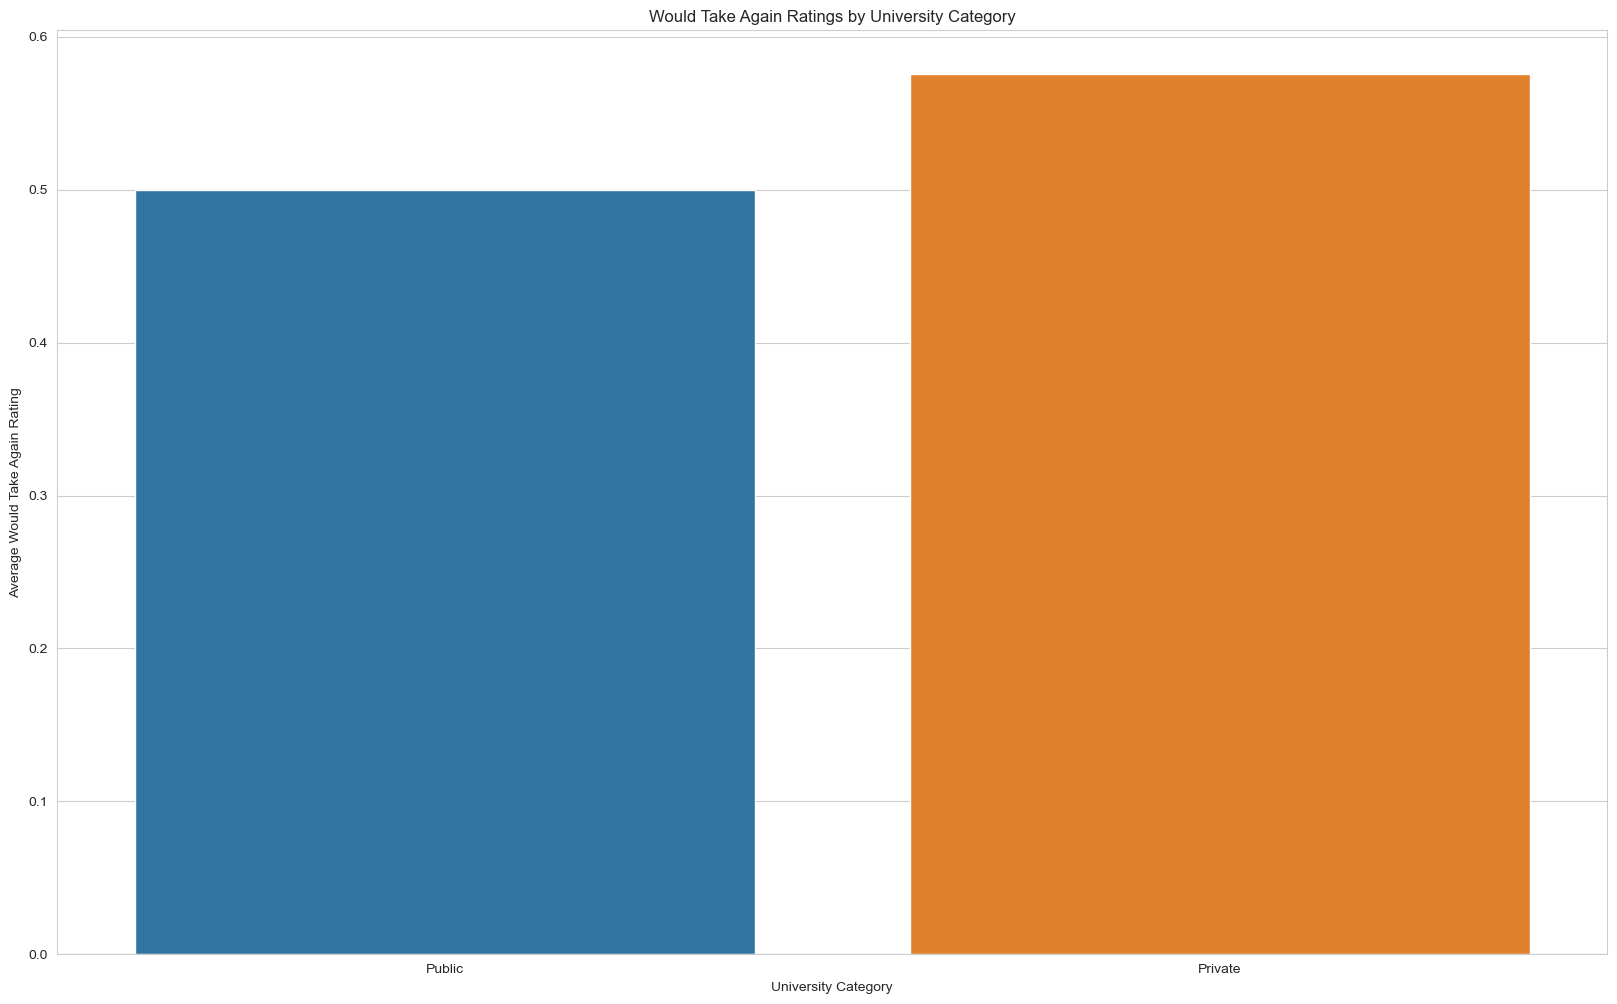

In [57]:
# Plot the data
plt.figure(figsize=(20, 12))
sns.barplot(data=df, x='University_Category', y='wouldTakeAgain_Rating', ci=None)
plt.title('Would Take Again Ratings by University Category')
plt.xlabel('University Category')
plt.ylabel('Average Would Take Again Rating')
plt.show()


/var/folders/p0/zvl7gz994b7bk8mzxm2d5sc00000gn/T/ipykernel_92476/1345504242.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='University_Category', y='wouldTakeAgain_Rating', hue='AsianProfessor', ci=None)
/Users/kritya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kritya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kritya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dt

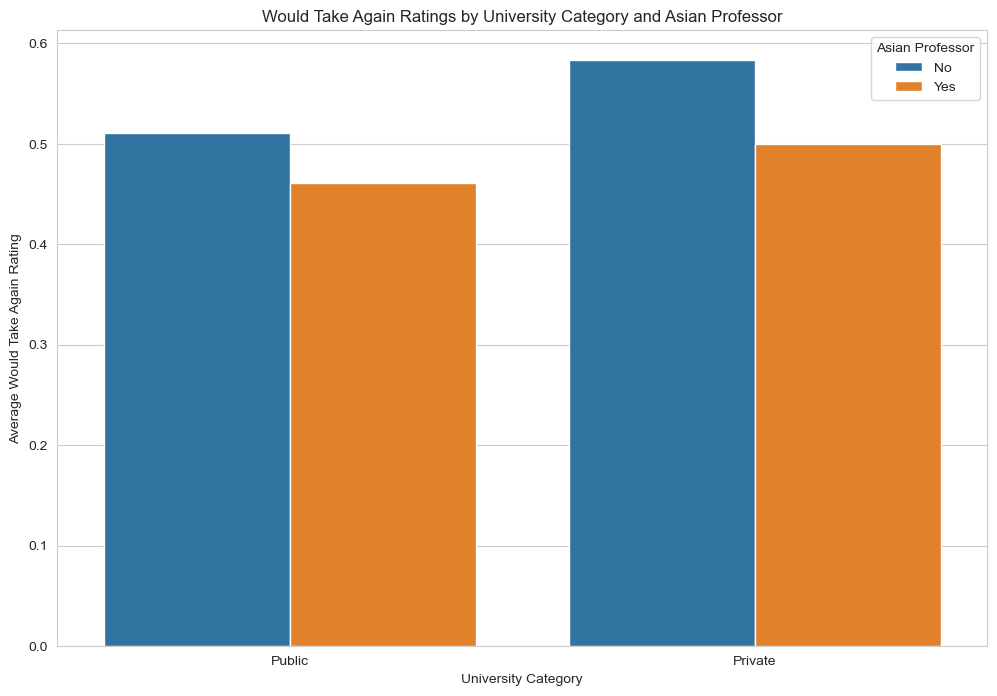

In [58]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='University_Category', y='wouldTakeAgain_Rating', hue='AsianProfessor', ci=None)
plt.title('Would Take Again Ratings by University Category and Asian Professor')
plt.xlabel('University Category')
plt.ylabel('Average Would Take Again Rating')
plt.legend(title='Asian Professor')
plt.show()

/var/folders/p0/zvl7gz994b7bk8mzxm2d5sc00000gn/T/ipykernel_92476/708874199.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='University_Category', y='wouldTakeAgain_Rating', hue='AsianProfessor', ci=None, estimator=np.mean)
/Users/kritya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kritya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kritya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

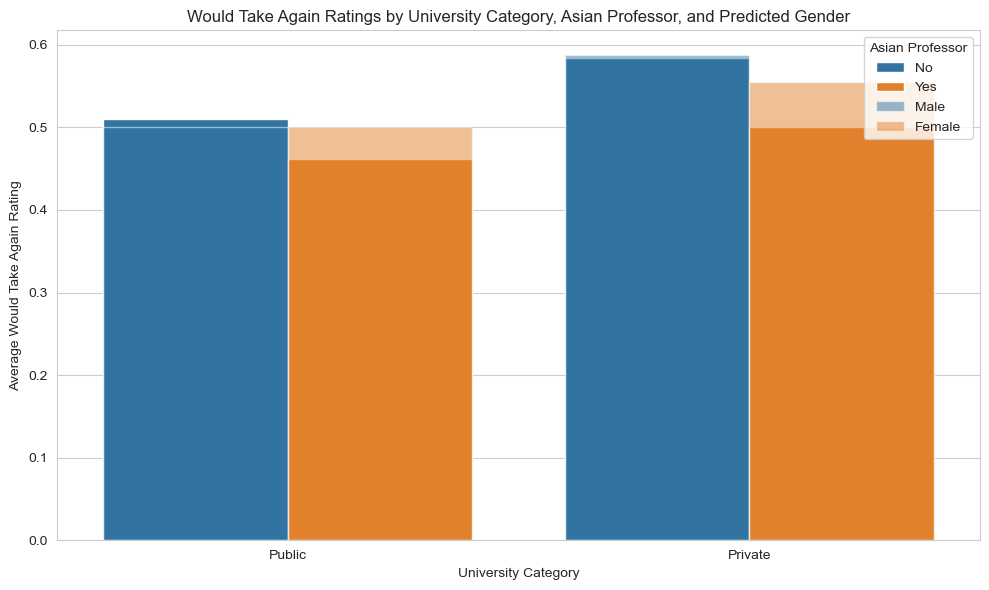

In [59]:
# Set visualization style
sns.set_style("whitegrid")

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='University_Category', y='wouldTakeAgain_Rating', hue='AsianProfessor', ci=None, estimator=np.mean)
sns.barplot(data=df, x='University_Category', y='wouldTakeAgain_Rating', hue='predictedGender', ci=None, alpha=0.5, estimator=np.mean)
plt.title('Would Take Again Ratings by University Category, Asian Professor, and Predicted Gender')
plt.xlabel('University Category')
plt.ylabel('Average Would Take Again Rating')
plt.legend(title='Asian Professor', loc='upper right')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


/var/folders/p0/zvl7gz994b7bk8mzxm2d5sc00000gn/T/ipykernel_92476/715469563.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='University_Category', y='wouldTakeAgain_Rating', hue='University_Category', dodge=True, ci=None)
/Users/kritya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kritya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kritya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. U

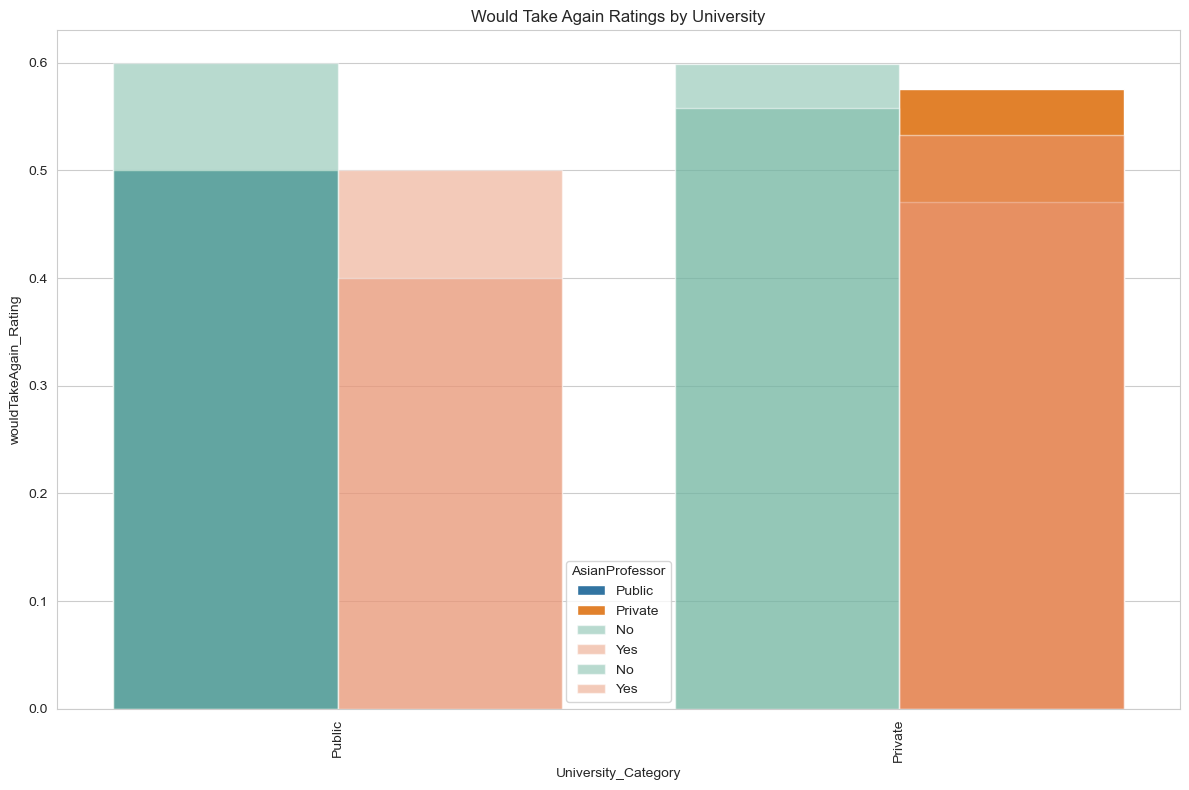

In [60]:
# Set visualization style
sns.set_style("whitegrid")

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='University_Category', y='wouldTakeAgain_Rating', hue='University_Category', dodge=True, ci=None)
plt.title('Would Take Again Ratings by University')
plt.xlabel('University')
plt.ylabel('Average Would Take Again Rating')
plt.legend(title='University Category', loc='upper right')

# Add predicted gender and Asian professor as additional hues
sns.color_palette("colorblind")  # Use a colorblind-friendly palette
for i, gender in enumerate(df['predictedGender'].unique()):
    sns.barplot(data=df[df['predictedGender'] == gender], x='University_Category', y='wouldTakeAgain_Rating', hue='AsianProfessor',
                dodge=True, alpha=0.5, palette="Set2", ci=None)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()